In [1]:
# Performed in line with edureka's online learning content
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [99]:
image=cv2.imread("eagle.jpg")

In [100]:
type(image)

numpy.ndarray

In [101]:
image.shape

(512, 773, 3)

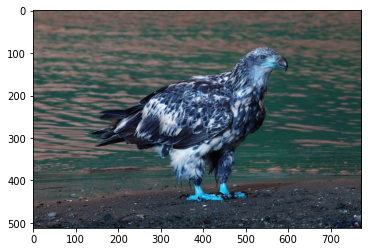

In [102]:
plt.imshow(image)

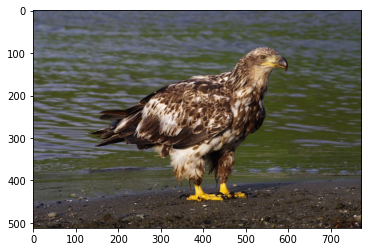

In [103]:
new_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [104]:
r,g,b=cv2.split(new_image)
print('Red',r)
print('Green',g)
print('Blue',b)

Red [[74 76 78 ... 72 71 71]
 [72 74 76 ... 74 73 72]
 [74 75 75 ... 76 75 74]
 ...
 [48 53 55 ... 23 24 24]
 [56 54 62 ... 27 27 26]
 [36 38 62 ... 29 35 38]]
Green [[80 81 83 ... 78 78 78]
 [78 79 81 ... 80 80 79]
 [80 81 81 ... 83 82 81]
 ...
 [39 43 43 ... 13 14 14]
 [47 46 53 ... 16 16 14]
 [27 30 53 ... 16 21 24]]
Blue [[106 110 112 ... 102  97  97]
 [104 108 110 ... 102  98  97]
 [106 107 107 ... 102  98  97]
 ...
 [ 30  31  29 ...  12  15  15]
 [ 38  33  36 ...  12  14  14]
 [ 18  17  36 ...  10  18  23]]


In [105]:
print(r.shape)
print(g.shape)
print(b.shape)

(512, 773)
(512, 773)
(512, 773)


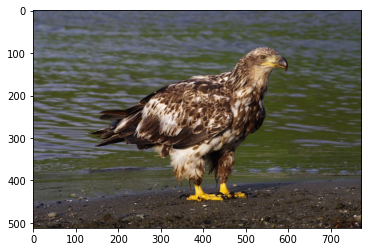

In [106]:
new_image=cv2.merge((r,g,b))
plt.imshow(new_image)

In [107]:
s=10
w=int(new_image.shape[1]*s/100)
h=int(new_image.shape[0]*s/100)
dim=(w,h)
re_size=cv2.resize(new_image,dim,interpolation=cv2.INTER_AREA)
re_size.shape

(51, 77, 3)

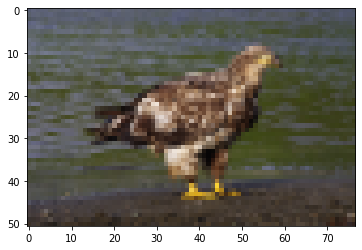

In [108]:
plt.imshow(re_size)

In [109]:
(h,w)=new_image.shape[:2]
c=(w/2,h/2)
angle=90
m=cv2.getRotationMatrix2D(c,angle,1.0)
rotate_90=cv2.warpAffine(new_image,m,(h,w))

In [145]:
h,w

(512, 773)

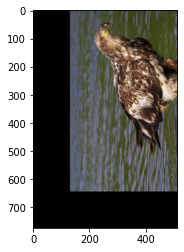

In [110]:
plt.imshow(rotate_90)

In [111]:
yolo=cv2.dnn.readNet("yolov3-tiny.weights","yolov3-tiny.cfg")

In [112]:
classes=[]
with open("coco.names",'r') as f:
  classes=f.read().splitlines()

In [113]:
len(classes)

80

In [114]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [115]:
img=cv2.imread("eagle.jpg")
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [116]:
blob.shape

(1, 3, 320, 320)

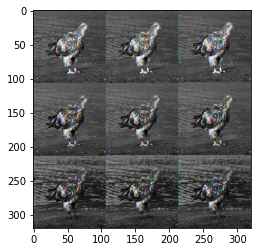

In [117]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [160]:
yolo.setInput(blob)

In [161]:
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)

In [162]:
width=177
height=285
boxes=[]
confidence=[]
class_ids=[]
for output in layeroutput:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)
    confidences=score[class_id]
    if confidences > 0.7:
      center_x=int(detection[0]*width)
      center_y=int(detection[0]*height)
      x=int(center_x-w/2)
      y=int(center_y-h/2)
      boxes.append([x,y,w,h])
      confidence.append(float(confidences))
      class_ids.append(class_id)


In [163]:
len(boxes)

1

In [164]:
indexes=cv2.dnn.NMSBoxes(boxes,confidence,0.5,0.4)

In [165]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [171]:
img=cv2.imread("eagle.jpg")
img.shape

(512, 773, 3)

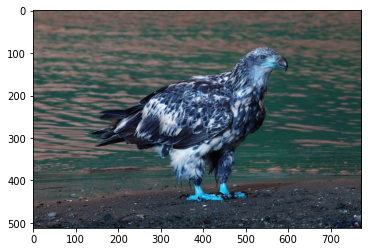

In [172]:
plt.imshow(img)

In [173]:
for i in indexes.flatten():
  x,y,w,h=boxes[i]
  label=str(classes[class_ids[i]])
  confi=str(round(confidence[i],2))
  color=colors[i]
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img,label+" "+confi,(x,y+20),font,2,(255,255,255),1)

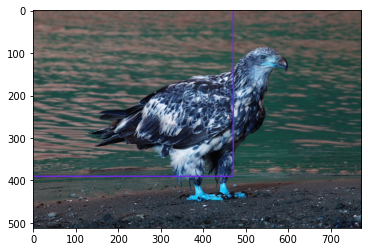

In [174]:
plt.imshow(img)

In [32]:
import os
os.getcwd()

'C:\\Users\\siddhartha borpuzari'

In [33]:
labels=open('coco.names').read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [34]:
weights_path='yolov3.weights'
configuration_path='yolov3.cfg'

# Setting minimum probability too detect weak prediction
probability_minimum=0.5

# Setting threshold for non maximum suppression
threshold=0.3

In [35]:
import cv2
network=cv2.dnn.readNetFromDarknet(configuration_path,weights_path)
layers_names_all=network.getLayerNames()
print(layers_names_all)

['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_2', 'bn_2', 'relu_3', 'conv_3', 'bn_3', 'relu_4', 'shortcut_4', 'conv_5', 'bn_5', 'relu_6', 'conv_6', 'bn_6', 'relu_7', 'conv_7', 'bn_7', 'relu_8', 'shortcut_8', 'conv_9', 'bn_9', 'relu_10', 'conv_10', 'bn_10', 'relu_11', 'shortcut_11', 'conv_12', 'bn_12', 'relu_13', 'conv_13', 'bn_13', 'relu_14', 'conv_14', 'bn_14', 'relu_15', 'shortcut_15', 'conv_16', 'bn_16', 'relu_17', 'conv_17', 'bn_17', 'relu_18', 'shortcut_18', 'conv_19', 'bn_19', 'relu_20', 'conv_20', 'bn_20', 'relu_21', 'shortcut_21', 'conv_22', 'bn_22', 'relu_23', 'conv_23', 'bn_23', 'relu_24', 'shortcut_24', 'conv_25', 'bn_25', 'relu_26', 'conv_26', 'bn_26', 'relu_27', 'shortcut_27', 'conv_28', 'bn_28', 'relu_29', 'conv_29', 'bn_29', 'relu_30', 'shortcut_30', 'conv_31', 'bn_31', 'relu_32', 'conv_32', 'bn_32', 'relu_33', 'shortcut_33', 'conv_34', 'bn_34', 'relu_35', 'conv_35', 'bn_35', 'relu_36', 'shortcut_36', 'conv_37', 'bn_37', 'relu_38', 'conv_38', 'bn_38', 'r

In [36]:
layers_names_output=[layers_names_all[i[0]-1] for i in network.getUnconnectedOutLayers()]

In [37]:
print(layers_names_output)

['yolo_82', 'yolo_94', 'yolo_106']


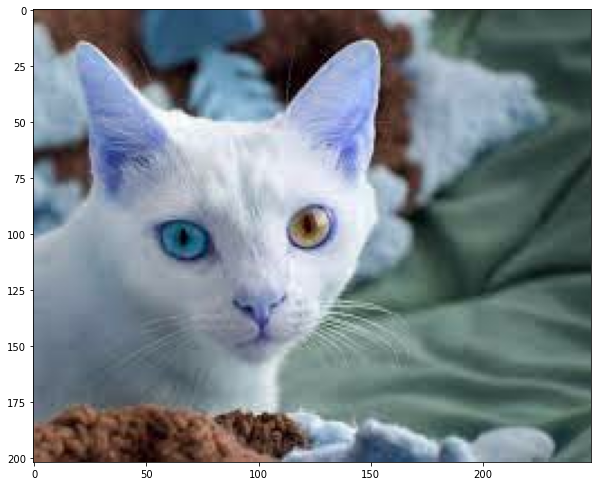

In [39]:
img=cv2.imread('test_images\cat.jpg')
plt.imshow(img)

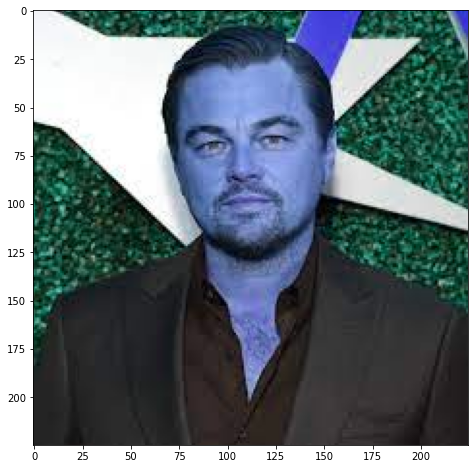

In [67]:
image=cv2.imread('leo.jpg')
images=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

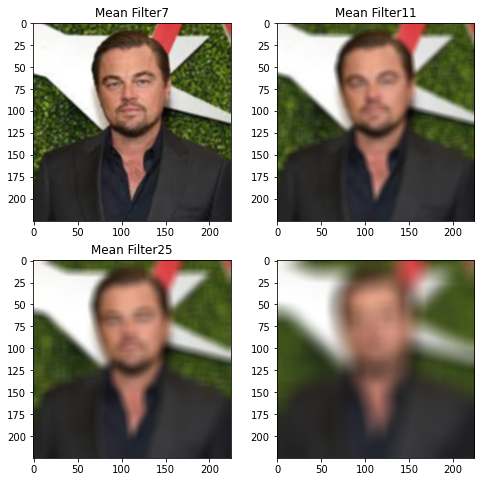

In [68]:
plt.figure(figsize=(8,8))
for s,i in enumerate([3,7,11,25]):
    mean_filter=cv2.filter2D(images,-1,np.ones((i,i))/i**2)
    plt.title(f"Mean Filter{i}")
    plt.subplot(2,2,s+1)
    plt.imshow(mean_filter)
plt.show()

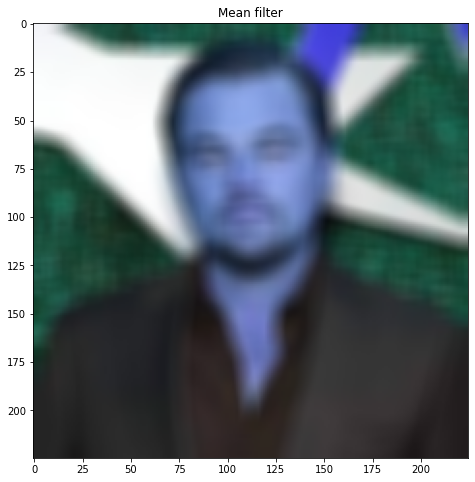

In [69]:
plt.figure(figsize=(8,8))
img=cv2.blur(image,(11,11))
plt.imshow(img)
plt.title("Mean filter")
plt.show()

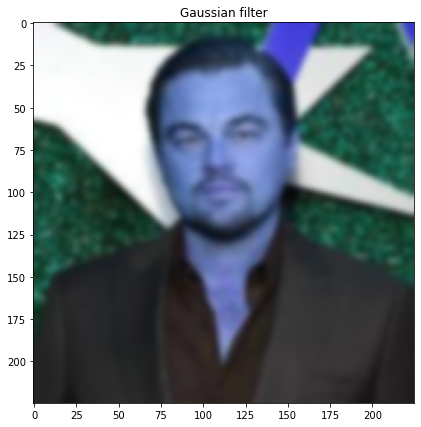

In [70]:
plt.figure(figsize=(7,7))
img=cv2.GaussianBlur(image,(11,11),11/6)
plt.imshow(img)
plt.title("Gaussian filter")
plt.show()

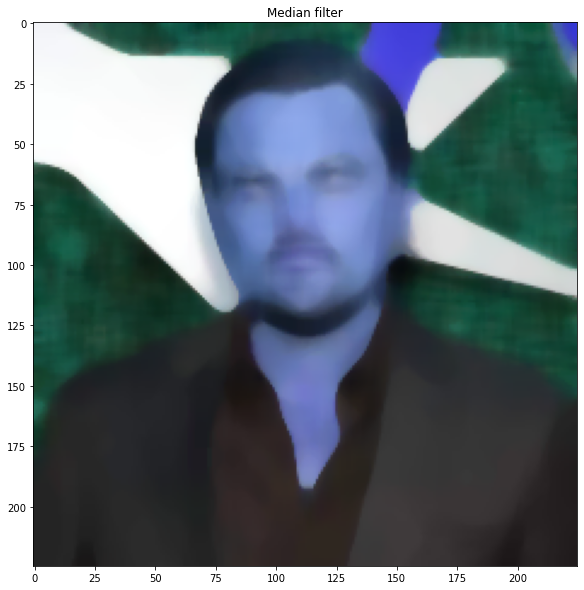

In [71]:
plt.figure(figsize=(10,10))
img=cv2.medianBlur(image,11)
plt.imshow(img)
plt.title("Median filter")
plt.show()

In [72]:
import os
print(os.listdir('test_images'))

['cat.jpg', 'einstein.jpg', 'horse.jpg', 'leo.jpg']


In [73]:
import glob
glob.glob('test_images/*')

['test_images\\cat.jpg',
 'test_images\\einstein.jpg',
 'test_images\\horse.jpg',
 'test_images\\leo.jpg']

In [47]:
path_to_test_images="C:\\Users\\siddhartha borpuzari\\test_images"

In [48]:
image_input=cv2.imread(os.path.join(path_to_test_images+'\\horse.jpg'))
print(image_input.shape)

(194, 259, 3)


In [49]:
blob=cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB=True,crop=False)
print(image_input.shape)
print(blob.shape)

(194, 259, 3)
(1, 3, 416, 416)


In [50]:
blob_to_show=blob[0,:,:,:].transpose(1,2,0)
print(blob_to_show.shape)

(416, 416, 3)


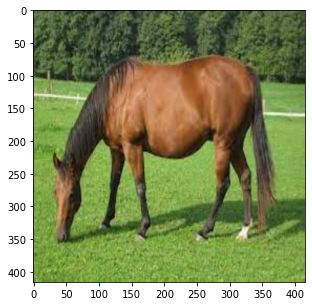

In [51]:
plt.rcParams['figure.figsize']=(5.0,5.0)
plt.imshow(blob_to_show)
plt.show()

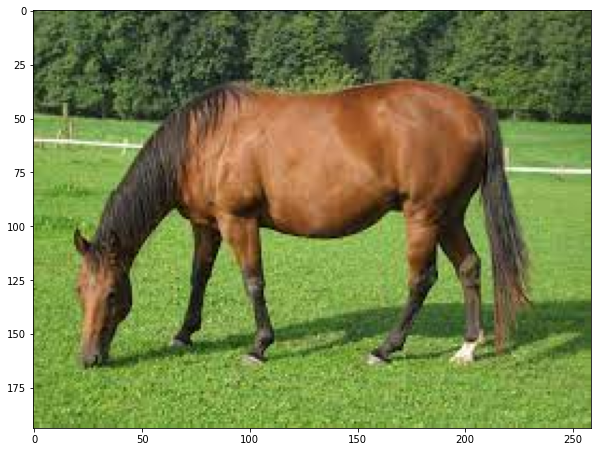

In [52]:
plt.rcParams['figure.figsize']=(10.0,10.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
bounding_boxes=[]
confidences=[]
class_numbers=[]

In [54]:
h,w=image_input.shape[:2]
print(h,w)

194 259


In [57]:
import time
network.setInput(blob)
start=time.time()
output_from_network=network.forward(layers_names_output)
end=time.time()
print('YOLO V3 took {:.5f} seconds'.format(end-start))

YOLO V3 took 1.18745 seconds


In [58]:
print(type(output_from_network))
print(type(output_from_network[0]))

<class 'list'>
<class 'numpy.ndarray'>


In [59]:
for result in output_from_network:
    for detection in result:
        scores=detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current > probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            bounding_boxes.append([x_min,y_min,int(box_width),int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

In [60]:
results=cv2.dnn.NMSBoxes(bounding_boxes,confidences,probability_minimum,threshold)
for i in range(len(class_numbers)):
    print(labels[int(class_numbers[i])])
    
with open('found_labels.txt','w') as f:
    for i in range(len(class_numbers)):
        f.write(labels[int(class_numbers[i])])

horse


In [62]:
np.random.seed(42)
colours=np.random.randint(0,255,size=(len(labels),3),dtype='uint8')
print(colours.shape)
print(colours[0])

(80, 3)
[102 220 225]


In [64]:
if len(results)>0:
    for i in results.flatten():
        x_min,y_min=bounding_boxes[i][0],bounding_boxes[i][1]
        box_width,box_height=bounding_boxes[i][2],bounding_boxes[i][3]
        colour_box_current=[int(j) for j in colours[class_numbers[i]]]
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
        text_box_current='{}:{:.4f}'.format(labels[int(class_numbers[i])],confidences[i])
        cv2.putText(image_input,text_box_current,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)        

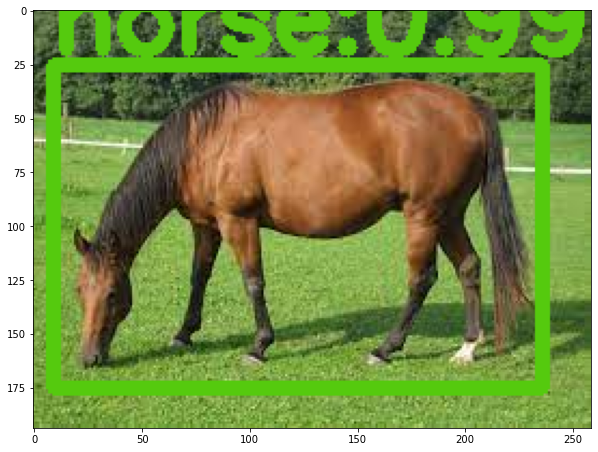

In [74]:
plt.rcParams['figure.figsize']=(10.0,10.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()